In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [4]:
from seirsplus.networks import generate_demographic_contact_network, household_country_data
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

# Test model with low prevalence

(As explored in test_deterministic_simulation.ipynb), set max_dt = 1, ie., when tau exceeds max_dt, the model increments by max_dt in time but does not run any transition

In [24]:

random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.001)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [25]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
)

sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 30,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    verbose=True,
    save_results=False,
    max_dt = 1
)

sim_correlated.run_simulation()



Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]


Running simulation with seed 0 for strategy correlated...
calling model.run_iteration(), time:  0
    Nodes with transition propensities:
    propensities.sum():  0.0
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.46it/s]


Screening day:  0  self.model.t:  0.01
calling model.run_iteration(), time:  0.01
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.02
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.03
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.04
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.05
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.060000000000000005
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.07
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.08
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.09
    No

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.76it/s]


Screening day:  1  self.model.t:  1.0000000000000007
calling model.run_iteration(), time:  1.0000000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0100000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0200000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0300000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0400000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0500000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0600000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0700000000000007
    Node

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.77it/s]


Screening day:  2  self.model.t:  2.210014944030336
calling model.run_iteration(), time:  2.210014944030336
    Nodes with transition propensities:
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.499999992875e-11)]
        node872, in state [1], propensity [('StoE', 2.499999998e-11)]
        node896, in state [1], propensity [('StoE', 1.6666666662777778e-11)]
    propensities.sum():  0.017195767262433864
    propensities sum to >0
    tau:  105.59983426388985
Running screening for group 3 on day 3...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 43.64it/s]


Screening day:  3  self.model.t:  3.210014944030336
calling model.run_iteration(), time:  3.210014944030336
    Nodes with transition propensities:
        node546, in state [2], propensity [('EtoIPRE', 100000.0)]
        node925, in state [2], propensity [('EtoIPRE', 100000.0)]
    propensities.sum():  200000.0
    propensities sum to >0
    tau:  6.2908769440310366e-06
{'t': 3.2100212349072796, 'transitionNode': 925, 'transitionNodeVL': 9.723595966502245, 'transitionType': 'EtoIPRE'}


calling model.run_iteration(), time:  3.2100212349072796
    Nodes with transition propensities:
        node546, in state [2], propensity [('EtoIPRE', 100000.0)]
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.499999992875e-11)]
        node836, in state [1], propensity [('StoE', 2.4999999975e-11)]
        node872, in state [1], propensity [('StoE'

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.92it/s]


Screening day:  4  self.model.t:  4.210024543685167
calling model.run_iteration(), time:  4.210024543685167
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 4.999999953500001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 1.666666663611111e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node415, in state [1], propensity [('StoE', 4.9999999945e-11)]
        node545, in state [2], propensity [('EtoIPRE', 100000.0)]
        node547, in state [2], propensity [('EtoIPRE', 100000.0)]
        node777, in state [1], propensity [('StoE', 0.007936507936507936)]
        node793, in state [1], propensity [('StoE', 0.009259259259259259)]
        node803, in state [1], propensity [('StoE', 2.4999999

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.51it/s]


Screening day:  5  self.model.t:  5.210040325507812
calling model.run_iteration(), time:  5.210040325507812
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [('St

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 68.16it/s]


Screening day:  6  self.model.t:  6.210070024457962
calling model.run_iteration(), time:  6.210070024457962
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [('St

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.93it/s]


Screening day:  7  self.model.t:  7.210078546426792
calling model.run_iteration(), time:  7.210078546426792
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [('St

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.34it/s]


Screening day:  8  self.model.t:  8.210081053531535
calling model.run_iteration(), time:  8.210081053531535
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [('St

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.72it/s]


Screening day:  9  self.model.t:  9.210088272702919
calling model.run_iteration(), time:  9.210088272702919
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [('St

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 27.13it/s]


Screening day:  10  self.model.t:  10.210088272702919
calling model.run_iteration(), time:  10.210088272702919
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.46it/s]


Screening day:  11  self.model.t:  11.210088272702919
calling model.run_iteration(), time:  11.210088272702919
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.27it/s]


Screening day:  12  self.model.t:  12.210088272702919
calling model.run_iteration(), time:  12.210088272702919
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.77it/s]


Screening day:  13  self.model.t:  13.210095510846724
calling model.run_iteration(), time:  13.210095510846724
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  13.220095510846724
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 32.85it/s]


Screening day:  14  self.model.t:  14.220095510846724
calling model.run_iteration(), time:  14.220095510846724
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.40it/s]


Screening day:  15  self.model.t:  15.220095510846724
calling model.run_iteration(), time:  15.220095510846724
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 37.51it/s]


Screening day:  16  self.model.t:  16.220095510846726
calling model.run_iteration(), time:  16.220095510846726
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.05it/s]


Screening day:  17  self.model.t:  17.220095510846726
calling model.run_iteration(), time:  17.220095510846726
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 29.97it/s]


Screening day:  18  self.model.t:  18.220095510846726
calling model.run_iteration(), time:  18.220095510846726
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 9.999999907000001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 3.333333327222222e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node266, in state [1], propensity [('StoE', 1.24999999640625e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node298, in state [1], propensity [('StoE', 1.2499999983125e-11)]
        node349, in state [1], propensity [('StoE', 9.9999999966e-12)]
        node383, in state [1], propensity [('StoE', 2.499999998e-11)]
        node397, in state [1], propensity [('StoE', 1.6666666648333333e-11)]
        node404, in state [1], propensity [(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.22it/s]


Screening day:  19  self.model.t:  19.220117119726474
calling model.run_iteration(), time:  19.220117119726474
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node249, in state [1], propensity [('StoE', 4.999999953500001e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node256, in state [1], propensity [('StoE', 1.666666663611111e-11)]
        node260, in state [1], propensity [('StoE', 1.666666663e-11)]
        node271, in state [1], propensity [('StoE', 4.999999979e-11)]
        node415, in state [1], propensity [('StoE', 4.9999999945e-11)]
        node546, in state [14], propensity [('QSYMtoQR', 100000.0)]
        node778, in state [1], propensity [('StoE', 0.005681818181818182)]
        node801, in state [1], propensity [('StoE', 4.999999964e-11)]
        node808, in state [1], propensity [('StoE', 1.666666664888889e-11)]
        node809, in state [1], propensity [('StoE',

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 42.32it/s]


Screening day:  20  self.model.t:  20.2201314502528
calling model.run_iteration(), time:  20.2201314502528
    Nodes with transition propensities:
        node778, in state [1], propensity [('StoE', 0.005681818181818182)]
        node801, in state [1], propensity [('StoE', 4.999999964e-11)]
        node808, in state [1], propensity [('StoE', 1.666666664888889e-11)]
        node809, in state [1], propensity [('StoE', 1.6666666652222223e-11)]
        node927, in state [14], propensity [('QSYMtoQR', 100000.0)]
    propensities.sum():  100000.00568181826
    propensities sum to >0
    tau:  1.4445315359822454e-05
{'t': 20.22014589556816, 'transitionNode': 927, 'transitionNodeVL': 0.0, 'transitionType': 'QSYMtoQR'}


calling model.run_iteration(), time:  20.22014589556816
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  20.23014589556816
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.23it/s]


Screening day:  21  self.model.t:  21.00014589556828
calling model.run_iteration(), time:  21.00014589556828
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  21.010145895568282
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  21.020145895568284
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  21.030145895568285
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  21.040145895568287
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  21.05014589556829
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  21.06014589556829
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  21.07014589556829
    Nodes wi

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.23it/s]


Screening day:  22  self.model.t:  22.000145895568437
calling model.run_iteration(), time:  22.000145895568437
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  22.01014589556844
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  22.02014589556844
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  22.03014589556844
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  22.040145895568443
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  22.050145895568445
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  22.060145895568446
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  22.070145895568448
    Nodes 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.28it/s]


Screening day:  23  self.model.t:  23.000145895568593
calling model.run_iteration(), time:  23.000145895568593
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  23.010145895568595
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  23.020145895568596
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  23.030145895568598
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  23.0401458955686
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  23.0501458955686
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  23.060145895568603
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  23.070145895568604
    Nodes w

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 40.30it/s]


Screening day:  24  self.model.t:  24.00014589556875
calling model.run_iteration(), time:  24.00014589556875
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  24.01014589556875
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  24.020145895568753
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  24.030145895568754
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  24.040145895568756
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  24.050145895568757
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  24.06014589556876
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  24.07014589556876
    Nodes wi

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.38it/s]


Screening day:  25  self.model.t:  25.000145895568906
calling model.run_iteration(), time:  25.000145895568906
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  25.010145895568908
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  25.02014589556891
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  25.03014589556891
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  25.040145895568912
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  25.050145895568914
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  25.060145895568915
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  25.070145895568917
    Nodes

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 68.24it/s]


Screening day:  26  self.model.t:  26.000145895569062
calling model.run_iteration(), time:  26.000145895569062
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  26.010145895569064
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  26.020145895569065
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  26.030145895569067
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  26.04014589556907
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  26.05014589556907
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  26.06014589556907
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  26.070145895569073
    Nodes 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.90it/s]


Screening day:  27  self.model.t:  27.00014589556922
calling model.run_iteration(), time:  27.00014589556922
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  27.01014589556922
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  27.02014589556922
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  27.030145895569223
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  27.040145895569225
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  27.050145895569226
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  27.060145895569228
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  27.07014589556923
    Nodes wi

Text(0.5, 1.0, 'Recorded viral load (solid) and underlying model values (dashed)')

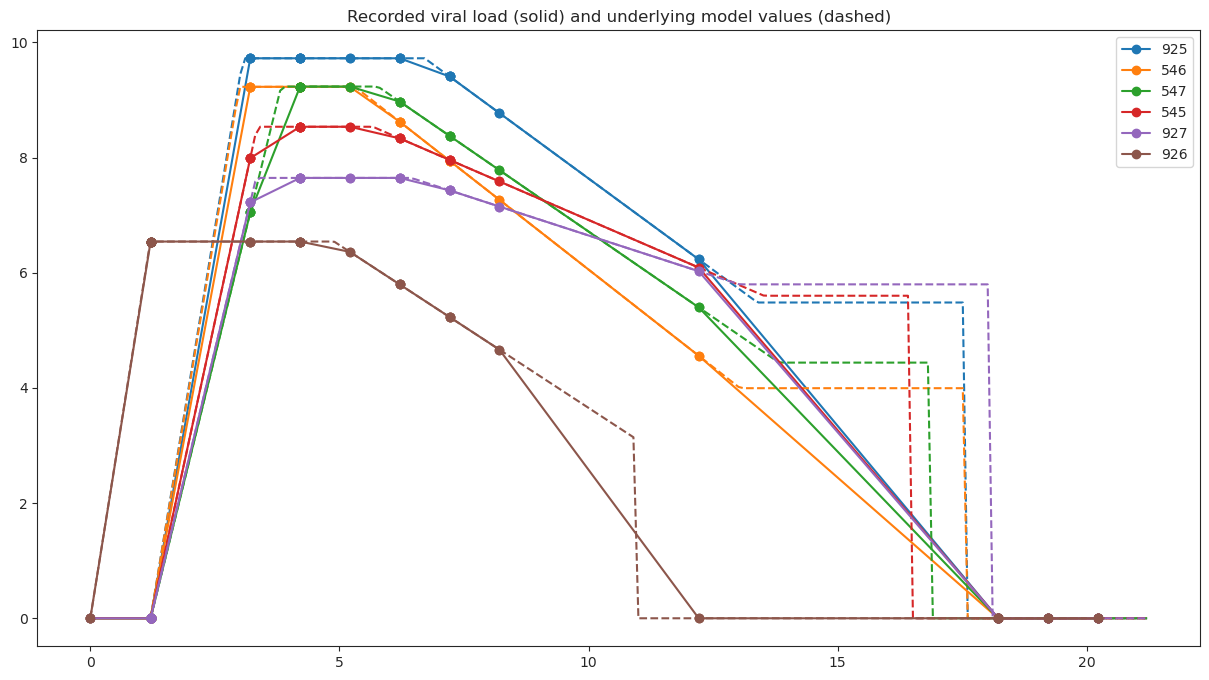

In [27]:
from seirsplus.calibration import _get_vl_with_plateau

plt.figure(figsize=(15,8))

for i in [925, 546, 547, 545, 927, 926]:
    # plot recorded infection curves (recording times = times at which a transition happened;
    # might be sparse if initial prevalence is low)
    plt.plot(
        sim_correlated.model.VL_over_time["time_points"],
        sim_correlated.model.VL_over_time["VL_time_series"][i],
        '-o',
        label=str(i), 
    )

    # plot underlying model values to make sure the recorded values match
    tmp = []
    time_range = np.linspace(
        sim_correlated.model.infection_start_times[i], 
        sim_correlated.model.infection_start_times[i] + 20, 
        201
    )
    for t in time_range:
        tmp.append(
            _get_vl_with_plateau(
                critical_time_points = sim_correlated.model.VL_params_by_node[i]["critical_time_points"],
                peak_plateau_height = sim_correlated.model.VL_params_by_node[i]["peak_plateau_height"],
                tail_height = sim_correlated.model.VL_params_by_node[i]["tail_height"],
                sample_time = t - sim_correlated.model.infection_start_times[i]
            )
        )
    plt.plot(time_range, tmp, '--', color=plt.gca().lines[-1].get_color())
plt.legend()

plt.title("Recorded viral load (solid) and underlying model values (dashed)")

In [28]:
sim_correlated.model.symptomatic_by_node[546]

array([ True])

In [29]:
sim_correlated.model.VL_params_by_node[546]

{'critical_time_points': [1.7803994237828509,
  4.103467151618752,
  11.83182284159208,
  16.339355405664087],
 'peak_plateau_height': 9.228063786737303,
 'tail_height': 3.995104373957224}

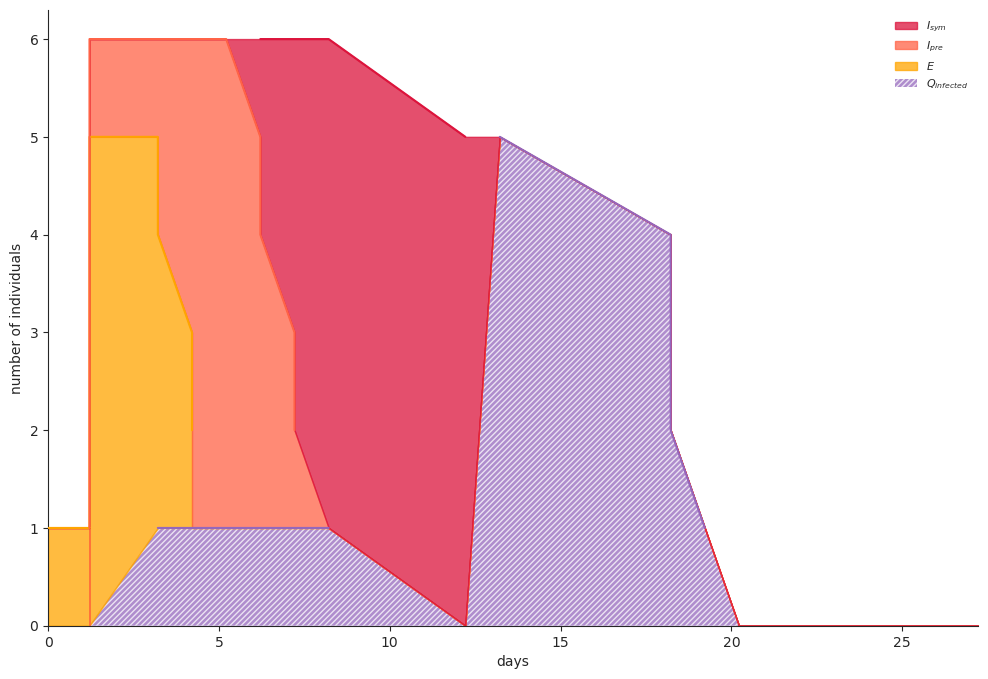

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [30]:
sim_correlated.model.figure_infections(plot_percentages=False)

# Try a higher initial prevalence

In [31]:

random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.01)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [32]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

test_model_2 = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
)

sim_correlated_2 = SimulationRunner(
    model=test_model_2,
    pooling_strategy='correlated',
    T = 30,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    verbose=True,
    save_results=False,
    max_dt = 1
)

sim_correlated_2.run_simulation()



Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]


Running simulation with seed 0 for strategy correlated...
calling model.run_iteration(), time:  0
    Nodes with transition propensities:
    propensities.sum():  0.0
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.95it/s]


Screening day:  0  self.model.t:  0.01
calling model.run_iteration(), time:  0.01
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.02
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.03
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.04
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.05
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.060000000000000005
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.07
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.08
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  0.09
    No

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.45it/s]


Screening day:  1  self.model.t:  1.0000000000000007
calling model.run_iteration(), time:  1.0000000000000007
    Nodes with transition propensities:
    propensities.sum():  0.0
calling model.run_iteration(), time:  1.0100000000000007
    Nodes with transition propensities:
        node740, in state [2], propensity [('EtoIPRE', 100000.0)]
    propensities.sum():  100000.0
    propensities sum to >0
    tau:  1.2469534642832206e-05
{'t': 1.0100124695346435, 'transitionNode': 740, 'transitionNodeVL': 8.78452442477977, 'transitionType': 'EtoIPRE'}


calling model.run_iteration(), time:  1.0100124695346435
    Nodes with transition propensities:
        node492, in state [1], propensity [('StoE', 0.0625)]
        node559, in state [1], propensity [('StoE', 1.6666666664444443e-11)]
        node738, in state [1], propensity [('StoE', 1666666666.5555556)]
        node739, in state [1], propensity [('StoE', 1666666666.6111112)]
        node984, in state [1], propensity [('StoE', 1666666666.55

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 61.89it/s]


Screening day:  2  self.model.t:  2.0100124702818345
calling model.run_iteration(), time:  2.0100124702818345
    Nodes with transition propensities:
        node254, in state [2], propensity [('EtoIPRE', 100000.0)]
        node314, in state [2], propensity [('EtoIPRE', 100000.0)]
        node492, in state [1], propensity [('StoE', 0.0625)]
        node559, in state [1], propensity [('StoE', 1.6666666664444443e-11)]
        node926, in state [2], propensity [('EtoIPRE', 100000.0)]
    propensities.sum():  300000.0625
    propensities sum to >0
    tau:  6.003847756873949e-06
{'t': 2.0100184741295912, 'transitionNode': 926, 'transitionNodeVL': 6.54142205303562, 'transitionType': 'EtoIPRE'}


calling model.run_iteration(), time:  2.0100184741295912
    Nodes with transition propensities:
        node254, in state [2], propensity [('EtoIPRE', 100000.0)]
        node314, in state [2], propensity [('EtoIPRE', 100000.0)]
        node492, in state [1], propensity [('StoE', 0.0625)]
        no

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.15it/s]


Screening day:  3  self.model.t:  3.679204405450671
calling model.run_iteration(), time:  3.679204405450671
    Nodes with transition propensities:
        node122, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node173, in state [1], propensity [('StoE', 2.499999999125e-11)]
        node195, in state [1], propensity [('StoE', 9.999999999e-12)]
        node245, in state [1], propensity [('StoE', 0.01)]
        node246, in state [1], propensity [('StoE', 4.999999951500001e-11)]
        node248, in state [1], propensity [('StoE', 0.011627906976744186)]
        node250, in state [1], propensity [('StoE', 0.00684931506849315)]
        node251, in state [1], propensity [('StoE', 4.999999985e-11)]
        node253, in state [1], propensity [('StoE', 4.999999957e-11)]
        node255, in state [1], propensity [('StoE', 4.999999976e-11)]
        node256, in state [1], propensity [('StoE', 1.666666663611111e-

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 29.03it/s]


Screening day:  4  self.model.t:  4.679212450065114
calling model.run_iteration(), time:  4.679212450065114
    Nodes with transition propensities:
        node122, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node173, in state [1], propensity [('StoE', 2.499999999125e-11)]
        node195, in state [1], propensity [('StoE', 9.999999999e-12)]
        node202, in state [3], propensity [('IPREtoISYM', 100000.0)]
        node245, in state [1], propensity [('StoE', 0.02)]
        node246, in state [1], propensity [('StoE', 9.999999903000002e-11)]
        node247, in state [1], propensity [('StoE', 0.005154639175257732)]
        node248, in state [1], propensity [('StoE', 0.011627906976744186)]
        node249, in state [1], propensity [('StoE', 4.999999953500001e-11)]
        node250, in state [1], propensity [('StoE', 0.0136986301369863)]
        node251, in state [1], propensity [('StoE', 4.99999998

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 67.06it/s]


Screening day:  5  self.model.t:  5.0895160465197415
calling model.run_iteration(), time:  5.0895160465197415
    Nodes with transition propensities:
        node122, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node173, in state [1], propensity [('StoE', 2.499999999125e-11)]
        node195, in state [1], propensity [('StoE', 9.999999999e-12)]
        node245, in state [1], propensity [('StoE', 0.04)]
        node246, in state [1], propensity [('StoE', 2.49999997575e-10)]
        node247, in state [1], propensity [('StoE', 0.010309278350515464)]
        node248, in state [1], propensity [('StoE', 0.023255813953488372)]
        node249, in state [1], propensity [('StoE', 2.4999999767500004e-10)]
        node250, in state [1], propensity [('StoE', 0.03424657534246575)]
        node251, in state [1], propensity [('StoE', 9.99999997e-11)]
        node253, in state [1], propensity [('StoE', 1.99999998

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.65it/s]


Screening day:  6  self.model.t:  6.301135392241186
calling model.run_iteration(), time:  6.301135392241186
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node122, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 4.99999999375e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node173, in state [1], propensity [('StoE', 2.499999999125e-11)]
        node195, in state [1], propensity [('StoE', 9.999999999e-12)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.05)]
        node246, in state [1], propensity [('StoE', 2.9999999709e-10)]
        node247, in state [1], propensity [('StoE', 0.015463917525773196)]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.95it/s]


Screening day:  7  self.model.t:  7.501186235374324
calling model.run_iteration(), time:  7.501186235374324
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node122, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 4.99999999375e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node173, in state [1], propensity [('StoE', 2.499999999125e-11)]
        node195, in state [1], propensity [('StoE', 9.999999999e-12)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.05)]
        node246, in state [1], propensity [('StoE', 2.9999999709000006e-10)]
        node247, in state [1], propensity [('StoE', 0.01546391752577

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.45it/s]


Screening day:  8  self.model.t:  8.873703124231735
calling model.run_iteration(), time:  8.873703124231735
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node122, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 4.99999999375e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node173, in state [1], propensity [('StoE', 2.499999999125e-11)]
        node195, in state [1], propensity [('StoE', 9.999999999e-12)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.05)]
        node246, in state [1], propensity [('StoE', 2.9999999709e-10)]
        node247, in state [1], propensity [('StoE', 0.015463917525773196)]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 67.81it/s]


Screening day:  9  self.model.t:  9.490585927820746
calling model.run_iteration(), time:  9.490585927820746
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node122, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 4.99999999375e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node173, in state [1], propensity [('StoE', 2.499999999125e-11)]
        node195, in state [1], propensity [('StoE', 9.999999999e-12)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node201, in state [13], propensity [('QPREtoQSYM', 100000.0)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.05)]
        node246, in state [1], propensity [('StoE', 2.9999999709e-10)]
    

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.14it/s]


Screening day:  10  self.model.t:  10.007984263468746
calling model.run_iteration(), time:  10.007984263468746
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node122, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 4.99999999375e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node173, in state [1], propensity [('StoE', 2.499999999125e-11)]
        node195, in state [1], propensity [('StoE', 9.999999999e-12)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.06)]
        node246, in state [1], propensity [('StoE', 3.49999996605e-10)]
        node247, in state [1], propensity [('StoE', 0.0257731958762886

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 56.31it/s]


Screening day:  11  self.model.t:  11.417141147134148
calling model.run_iteration(), time:  11.417141147134148
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node122, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 4.99999999375e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node173, in state [1], propensity [('StoE', 2.499999999125e-11)]
        node195, in state [1], propensity [('StoE', 9.999999999e-12)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node202, in state [14], propensity [('QSYMtoQR', 100000.0)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.06)]
        node246, in state [1], propensity [('StoE', 3.49999996605e-10)]
  

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.20it/s]


Screening day:  12  self.model.t:  12.135072118580846
calling model.run_iteration(), time:  12.135072118580846
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.06)]
        node246, in state [1], propensity [('StoE', 3.49999996605e-10)]
        node247, in state [1], propensity [('StoE', 0.030927835051546393)]
        node248, in state [1], propensity [('StoE', 0.05813953488372093)]
        node249, in state [1], propensity [('StoE', 3.9999999628000006e-10)]
        node250, in state [1], propensity [('StoE', 0.047

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.65it/s]


Screening day:  13  self.model.t:  13.65411145048033
calling model.run_iteration(), time:  13.65411145048033
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.06)]
        node246, in state [1], propensity [('StoE', 3.49999996605e-10)]
        node247, in state [1], propensity [('StoE', 0.03608247422680412)]
        node248, in state [2], propensity [('EtoIPRE', 100000.0)]
        node249, in state [1], propensity [('StoE', 3.9999999628000006e-10)]
        node250, in state [1], propensity [('StoE', 0.04794520547945

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 41.92it/s]


Screening day:  14  self.model.t:  14.004094307752213
calling model.run_iteration(), time:  14.004094307752213
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.07)]
        node246, in state [1], propensity [('StoE', 4.49999995635e-10)]
        node247, in state [1], propensity [('StoE', 0.041237113402061855)]
        node249, in state [1], propensity [('StoE', 4.4999999581500004e-10)]
        node250, in state [1], propensity [('StoE', 0.04794520547945205)]
        node251, in state [1], propensity [('StoE', 3.499

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.07it/s]


Screening day:  15  self.model.t:  15.161091388741834
calling model.run_iteration(), time:  15.161091388741834
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.060000000000000005)]
        node246, in state [1], propensity [('StoE', 3.9999999612e-10)]
        node247, in state [1], propensity [('StoE', 0.041237113402061855)]
        node249, in state [1], propensity [('StoE', 3.9999999628e-10)]
        node250, in state [1], propensity [('StoE', 0.04794520547945205)]
        node251, in state [1], propensity [('Sto

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 69.94it/s]


Screening day:  16  self.model.t:  16.079196926281874
calling model.run_iteration(), time:  16.079196926281874
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [1], propensity [('StoE', 0.060000000000000005)]
        node246, in state [1], propensity [('StoE', 4.49999995635e-10)]
        node247, in state [1], propensity [('StoE', 0.041237113402061855)]
        node249, in state [1], propensity [('StoE', 3.9999999628e-10)]
        node250, in state [1], propensity [('StoE', 0.04794520547945205)]
        node251, in state [1], propensity [('St

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.12it/s]


Screening day:  17  self.model.t:  17.13286360266914
calling model.run_iteration(), time:  17.13286360266914
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node246, in state [1], propensity [('StoE', 4.999999951500001e-10)]
        node247, in state [1], propensity [('StoE', 0.041237113402061855)]
        node249, in state [1], propensity [('StoE', 4.4999999581500004e-10)]
        node250, in state [1], propensity [('StoE', 0.0547945205479452)]
        node251, in state [1], propensity [('StoE', 2.999999991e-10)]
        node252, in state [1], propensity [('

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 78.92it/s]


Screening day:  18  self.model.t:  18.851356834705257
calling model.run_iteration(), time:  18.851356834705257
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node245, in state [2], propensity [('EtoIPRE', 100000.0)]
        node246, in state [1], propensity [('StoE', 4.4999999563500006e-10)]
        node247, in state [1], propensity [('StoE', 0.05154639175257732)]
        node249, in state [1], propensity [('StoE', 3.9999999628000006e-10)]
        node250, in state [1], propensity [('StoE', 0.04794520547945205)]
        node251, in state [1], propensity [('S

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 72.36it/s]


Screening day:  19  self.model.t:  19.85139114631265
calling model.run_iteration(), time:  19.85139114631265
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node246, in state [1], propensity [('StoE', 4.4999999563500006e-10)]
        node247, in state [1], propensity [('StoE', 0.04639175257731959)]
        node249, in state [1], propensity [('StoE', 3.9999999628000006e-10)]
        node250, in state [1], propensity [('StoE', 0.0410958904109589)]
        node251, in state [1], propensity [('StoE', 2.999999991e-10)]
        node252, in state [1], propensity [('

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.64it/s]


Screening day:  20  self.model.t:  20.545001656073772
calling model.run_iteration(), time:  20.545001656073772
    Nodes with transition propensities:
        node115, in state [1], propensity [('StoE', 4.9999999715e-11)]
        node129, in state [1], propensity [('StoE', 4.999999977e-11)]
        node135, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node164, in state [1], propensity [('StoE', 2.499999996875e-11)]
        node198, in state [1], propensity [('StoE', 2.4999999985e-11)]
        node201, in state [14], propensity [('QSYMtoQR', 100000.0)]
        node243, in state [1], propensity [('StoE', 1.6666666666111112e-11)]
        node246, in state [1], propensity [('StoE', 3.9999999612000006e-10)]
        node247, in state [1], propensity [('StoE', 0.03608247422680412)]
        node249, in state [1], propensity [('StoE', 3.9999999628000006e-10)]
        node250, in state [1], propensity [('StoE', 0.0273972602739726)]
        node251, in state [1], propensity [('

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.26it/s]


Screening day:  21  self.model.t:  21.185413351662284
calling model.run_iteration(), time:  21.185413351662284
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 3.4999999660500006e-10)]
        node247, in state [1], propensity [('StoE', 0.03608247422680412)]
        node249, in state [1], propensity [('StoE', 2.9999999721000003e-10)]
        node250, in state [1], propensity [('StoE', 0.02054794520547945)]
        node251, in state [1], propensity [('StoE', 1.999999994e-10)]
        node252, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node253, in state [1], propensity [('StoE', 3.4999999699e-10)]
        node256, in state [1], propensity [('StoE', 1.4999999972499998e-10)]
        node257, in state [1], propensity [('StoE', 6.666666658222222e-11)]
        node258, in state [1], propensity [('StoE', 9.999999979333333e-11)]
        node259, in state [1], propensity [('StoE', 3.99999999632e-11)]
        node260, in state [1], pro

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.57it/s]


Screening day:  22  self.model.t:  22.8844242313076
calling model.run_iteration(), time:  22.8844242313076
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 3.4999999660500006e-10)]
        node247, in state [1], propensity [('StoE', 0.030927835051546393)]
        node249, in state [1], propensity [('StoE', 2.4999999767500004e-10)]
        node250, in state [1], propensity [('StoE', 0.02054794520547945)]
        node251, in state [1], propensity [('StoE', 1.999999994e-10)]
        node252, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node253, in state [1], propensity [('StoE', 3.4999999699e-10)]
        node256, in state [1], propensity [('StoE', 1.1666666645277778e-10)]
        node257, in state [1], propensity [('StoE', 4.9999999936666666e-11)]
        node258, in state [1], propensity [('StoE', 9.999999979333333e-11)]
        node259, in state [1], propensity [('StoE', 3.99999999632e-11)]
        node260, in state [1], prope

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.17it/s]


Screening day:  23  self.model.t:  23.05452806692471
calling model.run_iteration(), time:  23.05452806692471
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 2.9999999709000006e-10)]
        node247, in state [1], propensity [('StoE', 0.030927835051546393)]
        node249, in state [1], propensity [('StoE', 1.9999999814000003e-10)]
        node250, in state [1], propensity [('StoE', 0.0136986301369863)]
        node251, in state [1], propensity [('StoE', 9.99999997e-11)]
        node253, in state [1], propensity [('StoE', 2.9999999742000004e-10)]
        node256, in state [1], propensity [('StoE', 9.999999981666665e-11)]
        node257, in state [1], propensity [('StoE', 3.333333329111111e-11)]
        node258, in state [1], propensity [('StoE', 8.333333316111112e-11)]
        node259, in state [1], propensity [('StoE', 3.99999999632e-11)]
        node260, in state [1], propensity [('StoE', 1.1666666641e-10)]
        node261, in state [1], p

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.44it/s]


Screening day:  24  self.model.t:  24.16881447920767
calling model.run_iteration(), time:  24.16881447920767
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 2.9999999709e-10)]
        node247, in state [1], propensity [('StoE', 0.030927835051546393)]
        node249, in state [1], propensity [('StoE', 1.9999999814000003e-10)]
        node251, in state [1], propensity [('StoE', 9.99999997e-11)]
        node253, in state [1], propensity [('StoE', 2.9999999742000004e-10)]
        node256, in state [1], propensity [('StoE', 1.1666666645277778e-10)]
        node257, in state [1], propensity [('StoE', 3.333333329111111e-11)]
        node258, in state [1], propensity [('StoE', 8.333333316111111e-11)]
        node259, in state [1], propensity [('StoE', 3.99999999632e-11)]
        node260, in state [1], propensity [('StoE', 1.1666666641e-10)]
        node261, in state [1], propensity [('StoE', 4.9999999926666667e-11)]
        node262, in state [1], pr

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.39it/s]


Screening day:  25  self.model.t:  25.056673919124126
calling model.run_iteration(), time:  25.056673919124126
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 2.49999997575e-10)]
        node247, in state [1], propensity [('StoE', 0.02577319587628866)]
        node249, in state [1], propensity [('StoE', 2.4999999767500004e-10)]
        node251, in state [1], propensity [('StoE', 4.999999985e-11)]
        node253, in state [1], propensity [('StoE', 2.4999999785e-10)]
        node256, in state [1], propensity [('StoE', 9.999999981666667e-11)]
        node257, in state [1], propensity [('StoE', 3.333333329111111e-11)]
        node258, in state [1], propensity [('StoE', 8.333333316111111e-11)]
        node259, in state [1], propensity [('StoE', 3.99999999632e-11)]
        node260, in state [1], propensity [('StoE', 1.1666666641e-10)]
        node261, in state [1], propensity [('StoE', 4.9999999926666667e-11)]
        node262, in state [1], propen

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 67.34it/s]


Screening day:  26  self.model.t:  26.042762774017316
calling model.run_iteration(), time:  26.042762774017316
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 2.49999997575e-10)]
        node247, in state [1], propensity [('StoE', 0.03092783505154639)]
        node249, in state [1], propensity [('StoE', 2.4999999767500004e-10)]
        node251, in state [1], propensity [('StoE', 4.999999985e-11)]
        node253, in state [1], propensity [('StoE', 2.4999999785e-10)]
        node256, in state [1], propensity [('StoE', 1.1666666645277778e-10)]
        node257, in state [1], propensity [('StoE', 3.333333329111111e-11)]
        node258, in state [1], propensity [('StoE', 8.333333316111111e-11)]
        node259, in state [1], propensity [('StoE', 3.99999999632e-11)]
        node260, in state [1], propensity [('StoE', 1.1666666641e-10)]
        node261, in state [1], propensity [('StoE', 4.9999999926666667e-11)]
        node262, in state [1], prope

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.90it/s]


Screening day:  27  self.model.t:  27.763332432950314
calling model.run_iteration(), time:  27.763332432950314
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 2.9999999709000006e-10)]
        node247, in state [1], propensity [('StoE', 0.041237113402061855)]
        node249, in state [1], propensity [('StoE', 3.4999999674500007e-10)]
        node251, in state [1], propensity [('StoE', 9.99999997e-11)]
        node252, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node253, in state [1], propensity [('StoE', 2.4999999785e-10)]
        node256, in state [1], propensity [('StoE', 9.999999981666667e-11)]
        node257, in state [1], propensity [('StoE', 3.333333329111111e-11)]
        node258, in state [1], propensity [('StoE', 6.66666665288889e-11)]
        node259, in state [1], propensity [('StoE', 3.99999999632e-11)]
        node260, in state [1], propensity [('StoE', 1.1666666641e-10)]
        node261, in state [1], propensi

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 53.40it/s]


Screening day:  28  self.model.t:  28.642431527961687
calling model.run_iteration(), time:  28.642431527961687
    Nodes with transition propensities:
        node246, in state [1], propensity [('StoE', 3.4999999660500006e-10)]
        node247, in state [1], propensity [('StoE', 0.03608247422680412)]
        node248, in state [4], propensity [('ISYMtoR', 100000.0)]
        node249, in state [1], propensity [('StoE', 3.9999999628000006e-10)]
        node250, in state [3], propensity [('IPREtoISYM', 100000.0)]
        node251, in state [1], propensity [('StoE', 9.99999997e-11)]
        node252, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node253, in state [1], propensity [('StoE', 1.9999999828e-10)]
        node256, in state [1], propensity [('StoE', 9.999999981666665e-11)]
        node257, in state [1], propensity [('StoE', 3.333333329111111e-11)]
        node258, in state [1], propensity [('StoE', 4.999999989666667e-11)]
        node259, in state [1], propensity [('St

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 67.99it/s]


Screening day:  29  self.model.t:  29.79808874565779
calling model.run_iteration(), time:  29.79808874565779
    Nodes with transition propensities:
        node245, in state [14], propensity [('QSYMtoQR', 100000.0)]
        node246, in state [1], propensity [('StoE', 3.4999999660500006e-10)]
        node247, in state [1], propensity [('StoE', 0.02577319587628866)]
        node249, in state [1], propensity [('StoE', 3.9999999628000006e-10)]
        node251, in state [1], propensity [('StoE', 9.99999997e-11)]
        node252, in state [1], propensity [('StoE', 4.9999999775e-11)]
        node253, in state [1], propensity [('StoE', 1.9999999828e-10)]
        node256, in state [1], propensity [('StoE', 1.1666666645277778e-10)]
        node257, in state [1], propensity [('StoE', 3.333333329111111e-11)]
        node258, in state [1], propensity [('StoE', 6.66666665288889e-11)]
        node259, in state [1], propensity [('StoE', 1.99999999816e-11)]
        node260, in state [1], propensity [(

In [33]:
infected_nodes = [log['infected_node'] for log in sim_correlated_2.model.infectionsLog]

Text(0.5, 1.0, 'Recorded viral load (solid) and underlying model values (dashed)')

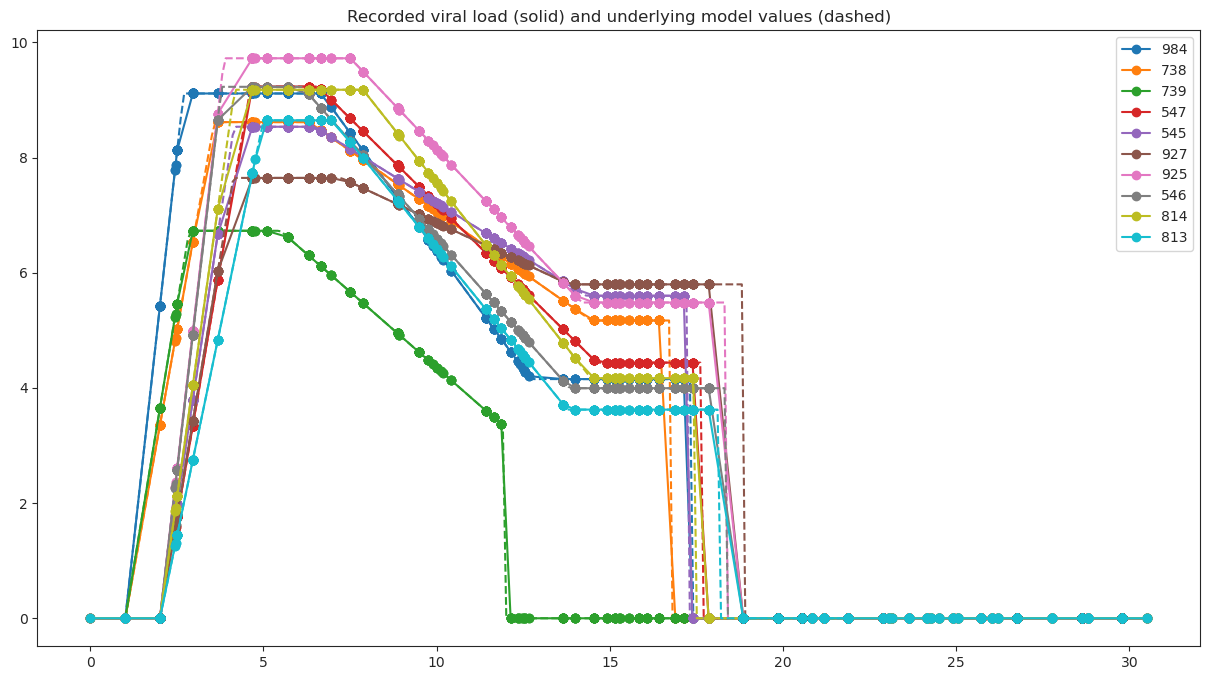

In [34]:
from seirsplus.calibration import _get_vl_with_plateau

plt.figure(figsize=(15,8))

for i in infected_nodes[:10]:
    # plot recorded infection curves (recording times = times at which a transition happened;
    # might be sparse if initial prevalence is low)
    plt.plot(
        sim_correlated_2.model.VL_over_time["time_points"],
        sim_correlated_2.model.VL_over_time["VL_time_series"][i],
        '-o',
        label=str(i), 
    )

    # plot underlying model values to make sure the recorded values match
    tmp = []
    time_range = np.linspace(
        sim_correlated_2.model.infection_start_times[i], 
        sim_correlated_2.model.infection_start_times[i] + 20, 
        201
    )
    for t in time_range:
        tmp.append(
            _get_vl_with_plateau(
                critical_time_points = sim_correlated_2.model.VL_params_by_node[i]["critical_time_points"],
                peak_plateau_height = sim_correlated_2.model.VL_params_by_node[i]["peak_plateau_height"],
                tail_height = sim_correlated_2.model.VL_params_by_node[i]["tail_height"],
                sample_time = t - sim_correlated_2.model.infection_start_times[i]
            )
        )
    plt.plot(time_range, tmp, '--', color=plt.gca().lines[-1].get_color())
plt.legend()

plt.title("Recorded viral load (solid) and underlying model values (dashed)")

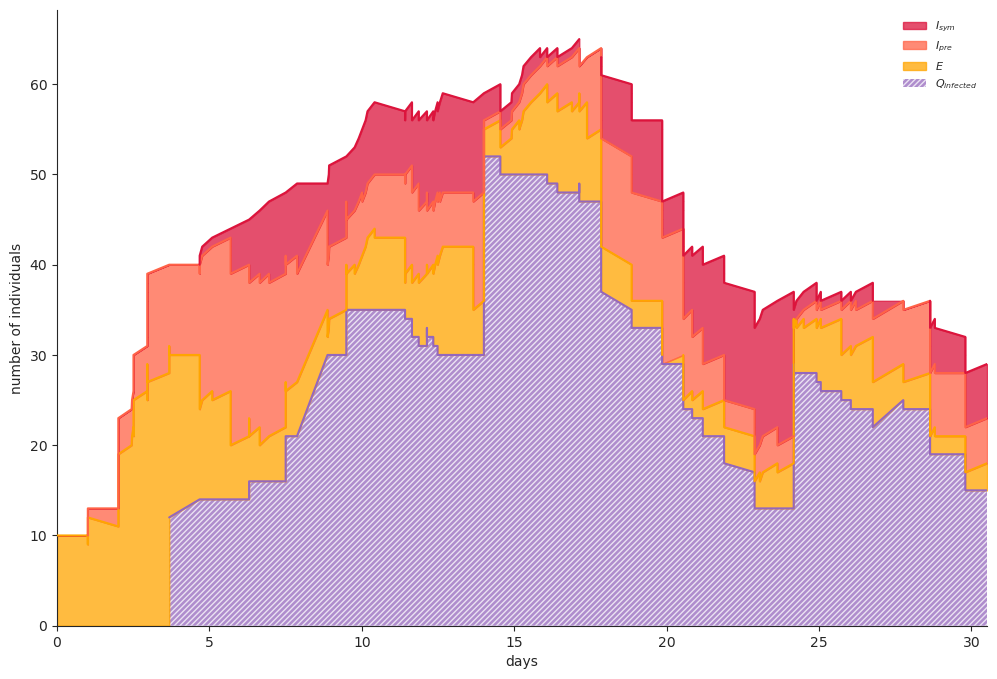

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [35]:
sim_correlated_2.model.figure_infections(plot_percentages=False)

In [37]:
sim_correlated_2.model.VL_params_by_node[739]

{'critical_time_points': [1.8441633934601107, 4.478113793881777, 11.0, 11.0],
 'peak_plateau_height': 6.728393242306364,
 'tail_height': 3.294769554685667}

In [38]:
sim_correlated_2.model.symptomatic_by_node[739]

array([False])